In [2]:
#Install necessary packages
!pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
!pip install pandas
!pip install numpy
!pip install keras

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
#Import all necessary libraries
import numpy as np
import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

import io

In [4]:
#Upload training data
from google.colab import files
uploaded    = files.upload()
data        = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


In [5]:
#Print data
print(data)

                                              questions         group
0     How did serfdom develop in and then leave Russ...   DESCRIPTION
1      What films featured the character Popeye Doyle ?        ENTITY
2     How can I find a list of celebrities ' real na...   DESCRIPTION
3     What fowl grabs the spotlight after the Chines...        ENTITY
4                       What is the full form of .com ?  ABBREVIATION
...                                                 ...           ...
5449           What type of currency is used in China ?        ENTITY
5450                    What is the temperature today ?       NUMERIC
5451              What is the temperature for cooking ?       NUMERIC
5452               What currency is used in Australia ?        ENTITY
5453       what is the sales of boost in february 2016?       NUMERIC

[5454 rows x 2 columns]


In [6]:
print("Preprocessing data")
filterd_list=[]
for qstn in data.questions.values:
  word_tokens         = word_tokenize(qstn)
  filtered_sentence   = [w for w in word_tokens if not w in stop_words]
  filtered_string     =" ".join(filtered_sentence)
  filterd_list.append(filtered_string)
print(filterd_list)

Preprocessing data
['How serfdom develop leave Russia ?', 'What films featured character Popeye Doyle ?', "How I find list celebrities ' real names ?", 'What fowl grabs spotlight Chinese Year Monkey ?', 'What full form .com ?', 'What contemptible scoundrel stole cork lunch ?', "What team baseball 's St. Louis Browns become ?", 'What oldest profession ?', 'What liver enzymes ?', 'Name scar-faced bounty hunter The Old West .', 'When Ozzy Osbourne born ?', 'Why heavier objects travel downhill faster ?', 'Who The Pride Yankees ?', 'Who killed Gandhi ?', 'What considered costliest disaster insurance industry ever faced ?', 'What sprawling U.S. state boasts airports ?', 'What repealed amendment U.S. Constitution deal ?', 'How many Jews executed concentration camps WWII ?', "What `` Nine Inch Nails '' ?", 'What annotated bibliography ?', 'What date Boxing Day ?', 'What articles clothing tokens Monopoly ?', 'Name 11 famous martyrs .', "What 's Olympic motto ?", "What origin name ` Scarlett ' ?

In [7]:
#Print target dictionry
data['target']      = data.group.astype('category').cat.codes
num_class           = len(np.unique(data.group.values))
y                   = data['target'].values
target_dict         = {}
for key,value in zip(y,data.group.values):
  target_dict[key]=value
print("Total number of classes")
print(num_class)
print("Target dictionry")
print(target_dict)

Total number of classes
6
Target dictionry
{1: 'DESCRIPTION', 2: 'ENTITY', 0: 'ABBREVIATION', 3: 'HUMAN', 5: 'NUMERIC', 4: 'LOCATION'}


In [8]:
#Create Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filterd_list)
print("Count of each words")
print(tokenizer.word_counts)
print("\nCount of each words in documentswise")
print(tokenizer.word_docs)
print("\nWord indices")
print(tokenizer.word_index)
print("\nTotal document count")
print(tokenizer.document_count)

Count of each words
OrderedDict([('how', 764), ('serfdom', 1), ('develop', 2), ('leave', 6), ('russia', 5), ('what', 3247), ('films', 6), ('featured', 8), ('character', 33), ('popeye', 4), ('doyle', 1), ('i', 210), ('find', 86), ('list', 10), ('celebrities', 3), ("'", 63), ('real', 15), ('names', 26), ('fowl', 1), ('grabs', 1), ('spotlight', 1), ('chinese', 10), ('year', 87), ('monkey', 3), ('full', 10), ('form', 17), ('com', 12), ('contemptible', 3), ('scoundrel', 3), ('stole', 5), ('cork', 4), ('lunch', 3), ('team', 34), ('baseball', 33), ("'s", 721), ('st', 14), ('louis', 5), ('browns', 2), ('become', 27), ('oldest', 12), ('profession', 5), ('liver', 2), ('enzymes', 1), ('name', 331), ('scar', 1), ('faced', 3), ('bounty', 4), ('hunter', 4), ('the', 162), ('old', 39), ('west', 20), ('when', 132), ('ozzy', 1), ('osbourne', 1), ('born', 31), ('why', 104), ('heavier', 2), ('objects', 3), ('travel', 12), ('downhill', 1), ('faster', 1), ('who', 561), ('pride', 2), ('yankees', 3), ('killed

In [9]:
#Create word matrix

#binary
print("Binary matrix")
post_seq = tokenizer.texts_to_matrix(filterd_list,mode ="binary")
print(post_seq)
#frequency
print("\nFrequency matrix")
post_seq = tokenizer.texts_to_matrix(filterd_list,mode ="freq")
print(post_seq)
#count
print("\nCount matrix")
post_seq = tokenizer.texts_to_matrix(filterd_list,mode ="count")
print(post_seq)
#freq
print("\nTFIDF matrix")
post_seq = tokenizer.texts_to_matrix(filterd_list,mode ="freq")
print(post_seq)


#shape
print("\nShape")
print(post_seq.shape)

Binary matrix
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Frequency matrix
[[0.         0.         0.2        ... 0.         0.         0.        ]
 [0.         0.16666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.125      ... 0.         0.         0.        ]
 ...
 [0.         0.33333333 0.         ... 0.         0.         0.        ]
 [0.         0.25       0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]

Count matrix
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

TFIDF matrix
[[0.         0.         0.2        ... 0.         0.         0.        ]
 [0.         0.16666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.125      ...

In [10]:
#Create word embeddings
post_seq = tokenizer.texts_to_sequences(filterd_list)
print("Embedding vectors")
print(post_seq)

Embedding vectors
[[2, 3440, 2154, 729, 897], [1, 730, 532, 82, 1174, 3441], [2, 9, 23, 399, 1536, 38, 250, 112], [1, 3442, 3443, 3444, 400, 22, 1537], [1, 401, 201, 309], [1, 1538, 1539, 898, 1175, 1540], [1, 79, 83, 3, 274, 899, 2155, 102], [1, 310, 900], [1, 2156, 3445], [7, 3446, 1541, 1176, 1177, 12, 64, 162], [16, 3447, 3448, 91], [19, 2157, 1542, 311, 3449, 3450], [4, 12, 2158, 1543], [4, 139, 1178], [1, 533, 3451, 3452, 1179, 3453, 292, 1541], [1, 3454, 14, 13, 25, 219, 2159], [1, 3455, 901, 14, 13, 902, 2160], [2, 6, 2161, 1180, 2162, 3456, 2163], [1, 534, 2164, 3457, 5], [1, 3458, 1544], [1, 163, 456, 50], [1, 2165, 903, 3459, 457], [7, 617, 49, 3460], [1, 3, 349, 535], [1, 39, 7, 1181, 38], [1, 3, 113, 1545, 40, 2166, 88], [4, 1546, 731, 904], [1, 80, 3461, 100, 70], [7, 402, 905, 2167, 458], [18, 28, 70, 3462, 3463, 732], [1, 202, 536, 55], [1, 3464, 1547], [2, 6, 733, 53, 734, 3465, 735, 736], [18, 42, 1548, 537, 52, 3466, 1182, 275, 203, 5], [2, 6, 1549, 3467, 403, 457], 

In [11]:
vocab_size = len(tokenizer.word_index) + 1
print("Total vocabulary size")
print(vocab_size)
print("Embedding vectors")
print(post_seq)

Total vocabulary size
8408
Embedding vectors
[[2, 3440, 2154, 729, 897], [1, 730, 532, 82, 1174, 3441], [2, 9, 23, 399, 1536, 38, 250, 112], [1, 3442, 3443, 3444, 400, 22, 1537], [1, 401, 201, 309], [1, 1538, 1539, 898, 1175, 1540], [1, 79, 83, 3, 274, 899, 2155, 102], [1, 310, 900], [1, 2156, 3445], [7, 3446, 1541, 1176, 1177, 12, 64, 162], [16, 3447, 3448, 91], [19, 2157, 1542, 311, 3449, 3450], [4, 12, 2158, 1543], [4, 139, 1178], [1, 533, 3451, 3452, 1179, 3453, 292, 1541], [1, 3454, 14, 13, 25, 219, 2159], [1, 3455, 901, 14, 13, 902, 2160], [2, 6, 2161, 1180, 2162, 3456, 2163], [1, 534, 2164, 3457, 5], [1, 3458, 1544], [1, 163, 456, 50], [1, 2165, 903, 3459, 457], [7, 617, 49, 3460], [1, 3, 349, 535], [1, 39, 7, 1181, 38], [1, 3, 113, 1545, 40, 2166, 88], [4, 1546, 731, 904], [1, 80, 3461, 100, 70], [7, 402, 905, 2167, 458], [18, 28, 70, 3462, 3463, 732], [1, 202, 536, 55], [1, 3464, 1547], [2, 6, 733, 53, 734, 3465, 735, 736], [18, 42, 1548, 537, 52, 3466, 1182, 275, 203, 5], [2,

In [12]:
#Create padding
MAX_LENGTH      = 22
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)
print(post_seq_padded)

[[   0    0    0 ... 2154  729  897]
 [   0    0    0 ...   82 1174 3441]
 [   0    0    0 ...   38  250  112]
 ...
 [   0    0    0 ...    1  815 2127]
 [   0    0    0 ... 3439   40  502]
 [   0    0    0 ... 3438 1149 8407]]


In [21]:
#Create one hot encoding of target values
Y_train  =  to_categorical(y)
print(Y_train)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [23]:
#training data creation
X_train  = post_seq_padded
print("X_train")
print(X_train)
print("Y_train")
print(Y_train)

X_train
[[   0    0    0 ... 2154  729  897]
 [   0    0    0 ...   82 1174 3441]
 [   0    0    0 ...   38  250  112]
 ...
 [   0    0    0 ...    1  815 2127]
 [   0    0    0 ... 3439   40  502]
 [   0    0    0 ... 3438 1149 8407]]
Y_train
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [37]:
#Model building
inputs          = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
dropout1        = Dropout(.6)(embedding_layer)
x               = LSTM(64)(dropout1)
dropout2        = Dropout(.6)(x)
x               = Dense(32, activation='relu')(dropout2)
predictions     = Dense(num_class, activation='softmax')(x)
model           = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


In [33]:
#Model summary
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 22, 128)           1076224   
_________________________________________________________________
dropout_12 (Dropout)         (None, 22, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 6)               

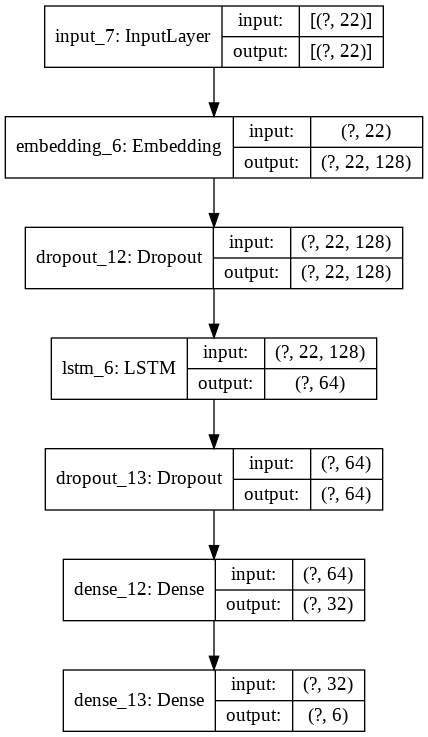

In [34]:
#Model plotting
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
#Training
model.fit([X_train], batch_size=64, y=Y_train, verbose=1, shuffle=True,
      epochs=2)

Epoch 1/2
86/86 [==============================] - 3s 37ms/step - loss: 1.6727 - acc: 0.2508
Epoch 2/2
86/86 [==============================] - 3s 37ms/step - loss: 1.2176 - acc: 0.5266


In [26]:
#Prediction
question              = input("Enter question to classify")
word_tokens           = word_tokenize(question)
filtered_sentence     = [w for w in word_tokens if not w in stop_words]
filtered_string       = " ".join(filtered_sentence)

query                 = [filtered_string]

sequence              = tokenizer.texts_to_sequences(query)[0]
post_seq_padded       = pad_sequences([sequence], maxlen=MAX_LENGTH)

predicted             = model.predict(post_seq_padded)
predicted             = np.argmax(predicted, axis=1)
class_predicted       = target_dict[int(predicted)]
print("Predicted class")
print(class_predicted)

Enter question to classifyHow did serfdom develop in and then leave Russ
Predicted class
DESCRIPTION
